<a href="https://colab.research.google.com/github/projktapp/InstrumentosOpticos/blob/main/Entregable1_InstrumentosOpticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Parametros compartidos

In [15]:
from PIL import Image
#N = (1/Δx)(1/Δf)
import numpy as np
import matplotlib.pyplot as plt
delx = 3.45*(10**(-6))
N = 2048
delf = 1/(delx*N)
print(f"delf {delf}")
lamb = 633*(10**(-9))
k = 2*np.pi/lamb
M = 1/(lamb*delf)
lim = (M*(delx**2))/lamb
print(lim)

delf 141.53079710144928
0.20988423440623521
78.86682995260662


Metodo Espectro Angular

In [49]:
def Espectro_angular(z, matrix):

  spectrum_z = np.fft.fft2(matrix)

  p = np.fft.ifftshift(np.arange(-2048/2, 2048/2))
  q = np.fft.ifftshift(np.arange(-2048/2, 2048/2))
  p, q = np.meshgrid(p, q)

  multiplier = np.exp(1j * z * k * np.sqrt(1 - (lamb * delf)**2 * (p**2 + q**2)))

  spectrum_0 = spectrum_z * multiplier
  spectrum_0 = np.fft.fftshift(spectrum_0)


  aperture_field = np.fft.ifft2(spectrum_0)

  plt.imshow(np.abs(aperture_field), cmap='viridis')
  plt.colorbar()
  plt.show()

Apertura comparacion difractada mediante espectro angular[link text](https://)

Difraccion distancia inversa tomando imagen compleja

[-0.145 -0.146 -0.147 -0.148 -0.149 -0.15  -0.151 -0.152 -0.153 -0.154
 -0.155]
Distancia inversa 145.0 mm


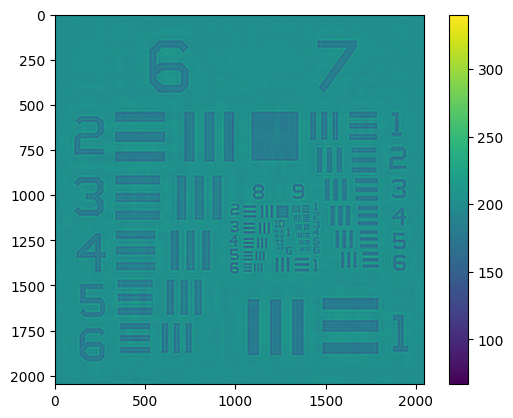

Distancia inversa 146.0 mm


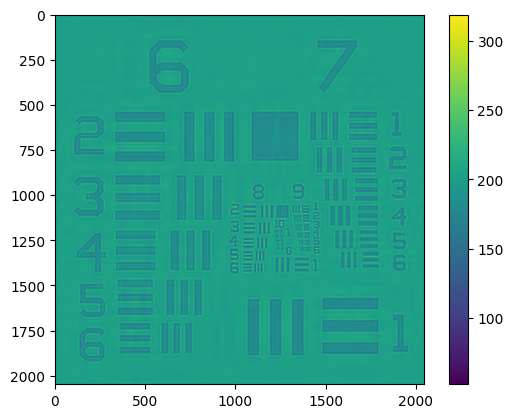

Distancia inversa 147.0 mm


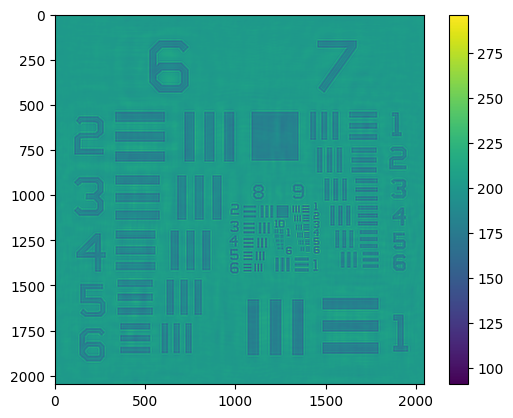

Distancia inversa 148.0 mm


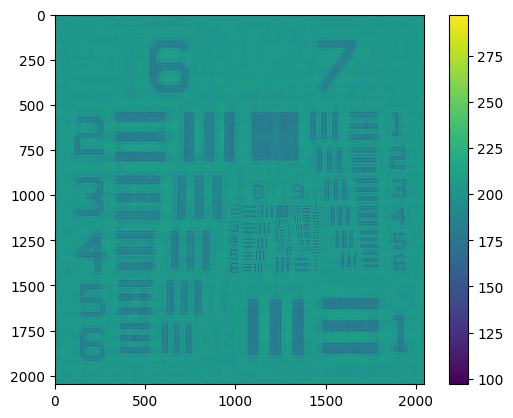

Distancia inversa 149.0 mm


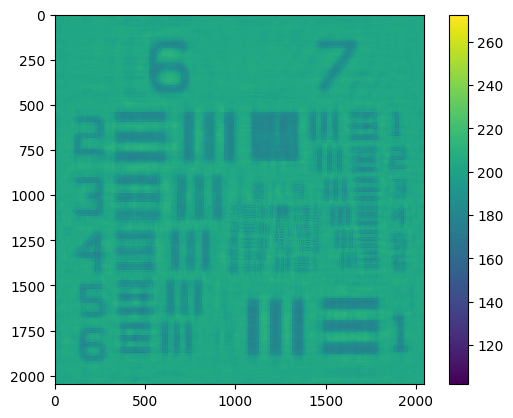

Distancia inversa 150.0 mm


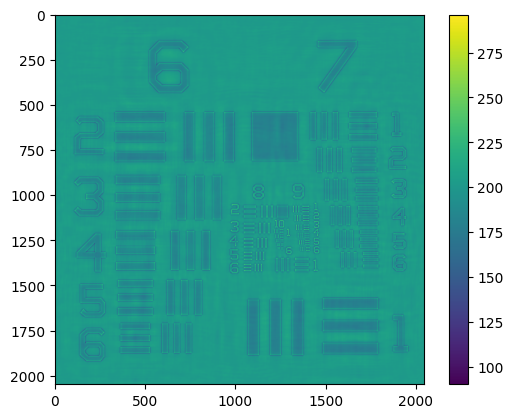

Distancia inversa 151.0 mm


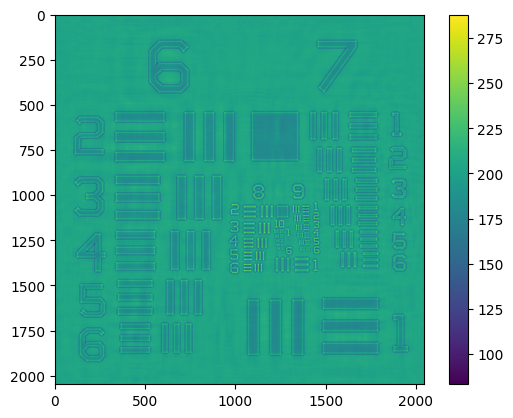

Distancia inversa 152.0 mm


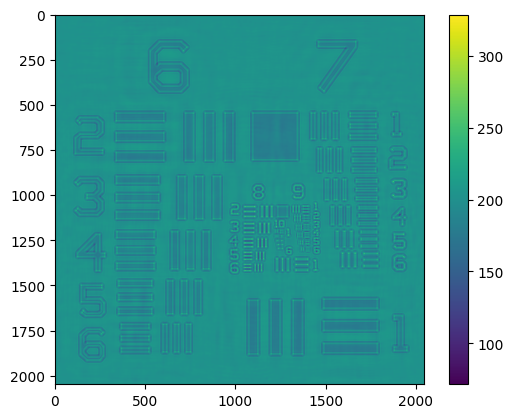

Distancia inversa 153.0 mm


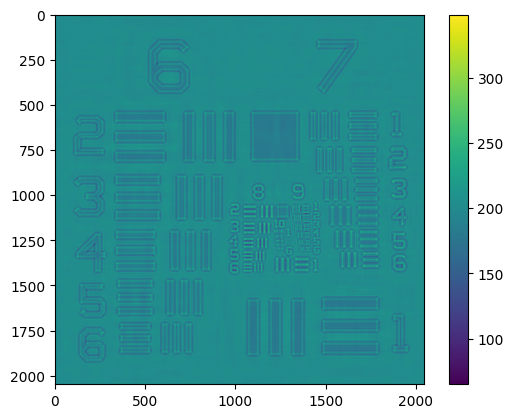

Distancia inversa 154.0 mm


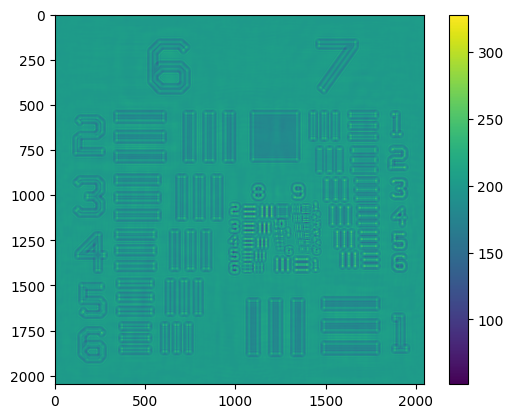

Distancia inversa 155.0 mm


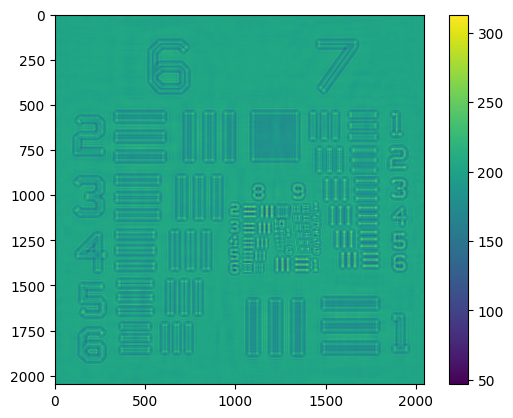

In [47]:
real_image = Image.open('Real.png')
imag_image = Image.open('Imag.png')

real_image = np.array(real_image, dtype=np.float32)
imag_image = np.array(imag_image, dtype=np.float32)

result = imag_image * 1j
complex_image = np.array(real_image) + np.array(result)

distances = np.linspace(145, 155, 11)
distances = distances*(-10**(-3))
print(distances)
for distance in distances:
  print(f"Distancia inversa {distance * -10**(3)} mm")
  Espectro_angular(distance, complex_image)


Difraccion distancia inversa tomando solo intensidad de imagen

[-0.145 -0.146 -0.147 -0.148 -0.149 -0.15  -0.151 -0.152 -0.153 -0.154
 -0.155]
Distancia inversa 145.0 mm


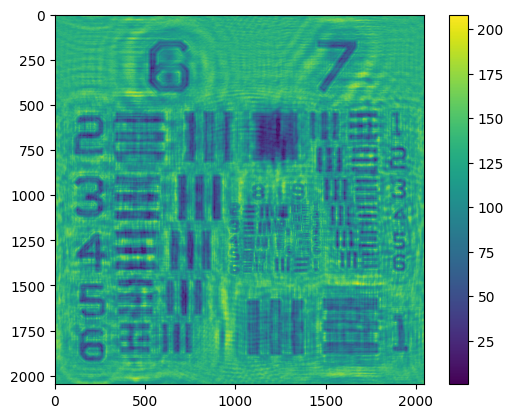

Distancia inversa 146.0 mm


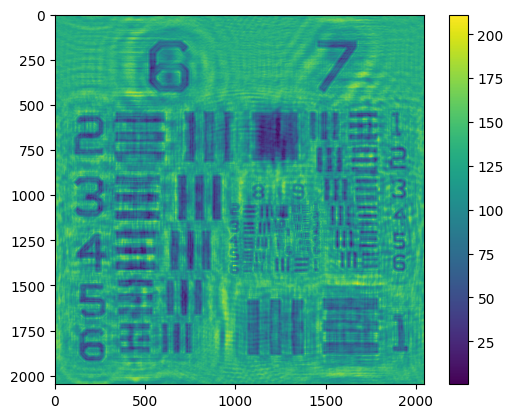

Distancia inversa 147.0 mm


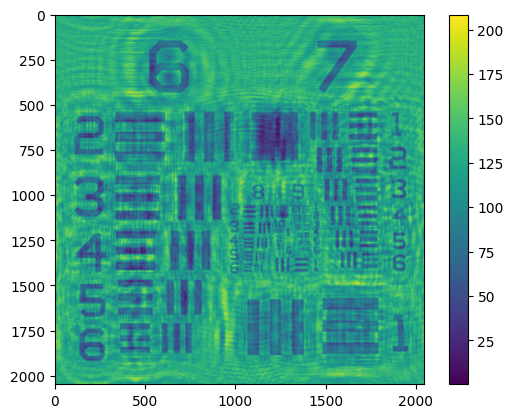

Distancia inversa 148.0 mm


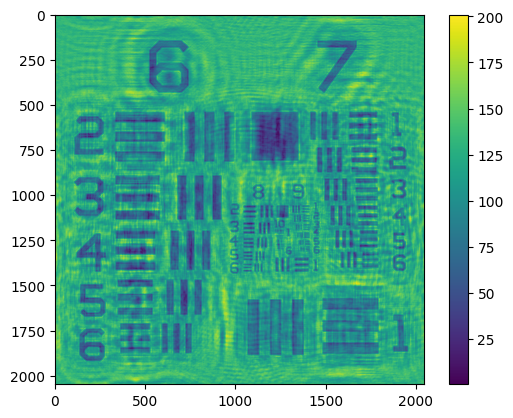

Distancia inversa 149.0 mm


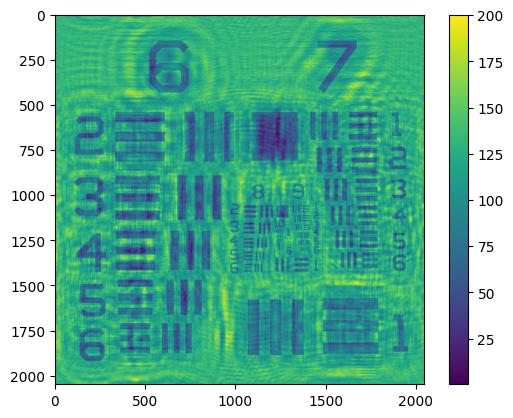

Distancia inversa 150.0 mm


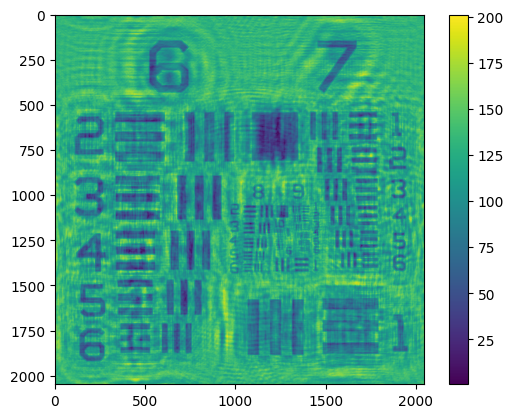

Distancia inversa 151.0 mm


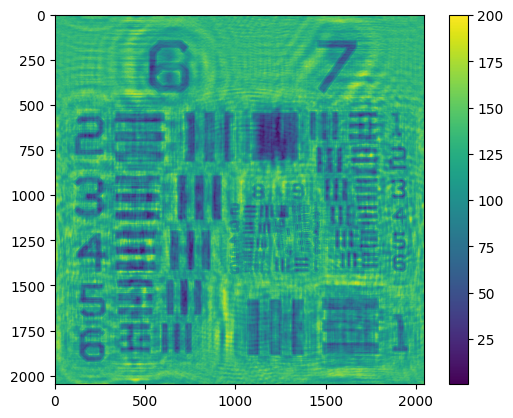

Distancia inversa 152.0 mm


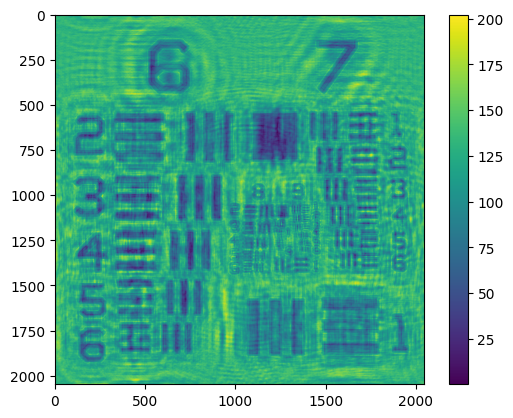

Distancia inversa 153.0 mm


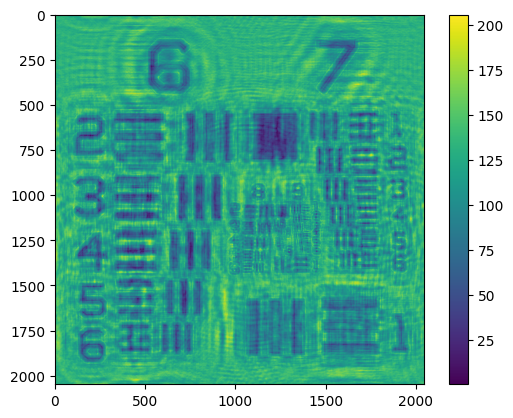

Distancia inversa 154.0 mm


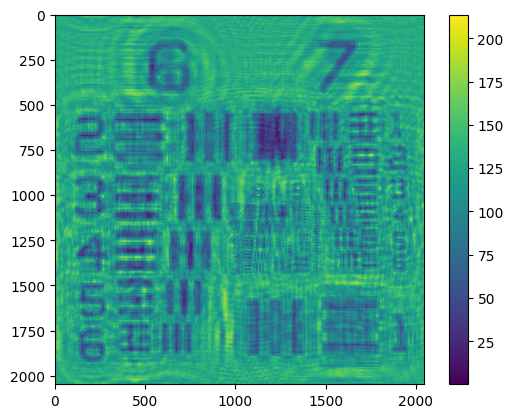

Distancia inversa 155.0 mm


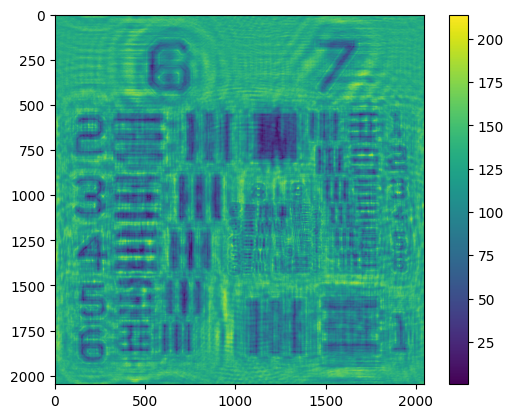

In [48]:
intensity_image = Image.open('Intensity.png')
intensity_image = np.array(intensity_image, dtype=np.float32)

distances = np.linspace(145, 155, 11)
distances = distances*(-10**(-3))
print(distances)
for distance in distances:
  print(f"Distancia inversa {distance * -10**(3)} mm")
  Espectro_angular(distance, intensity_image)

Creacion de la malla a difractar mediante metodo de transferencia de Fresnel

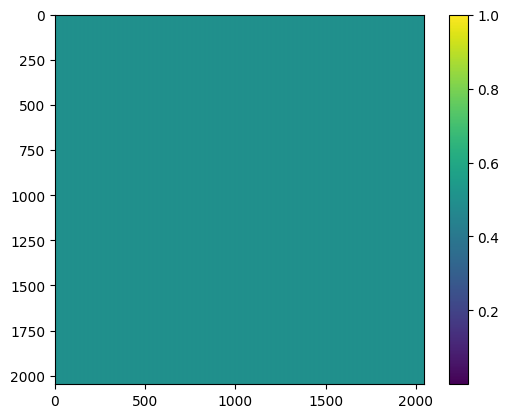

In [53]:
points = np.linspace(0, 7065.6, 2048)
points = points*(10**(-6))
l = 2*(3.45*(10**(-6)))
m = 1
function_line = 0.5 * (1 + m * np.cos(points * np.pi * 2 / l))

malla = np.tile(function_line, (2048, 1))

plt.imshow(matrix, cmap='viridis')
plt.colorbar()
plt.show()

8.393800947867298
N 111600.00000000001


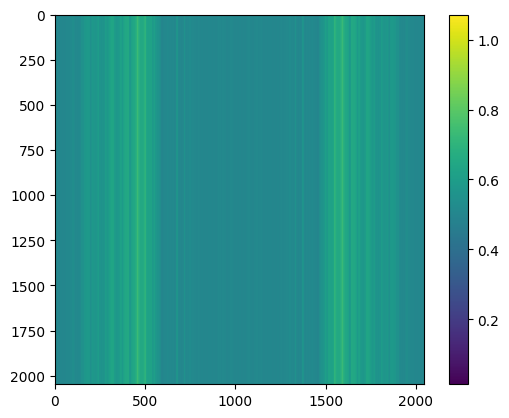

8.39387616113744
N 111601.00000000001


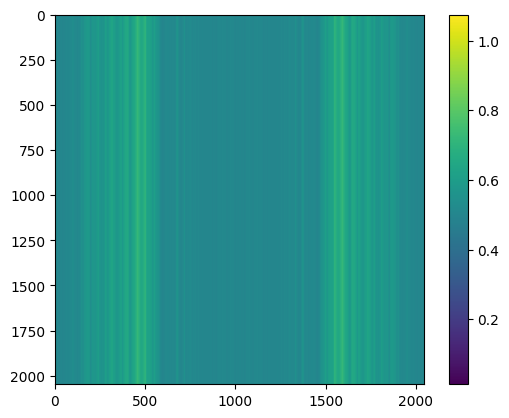

8.393951374407582
N 111602.0


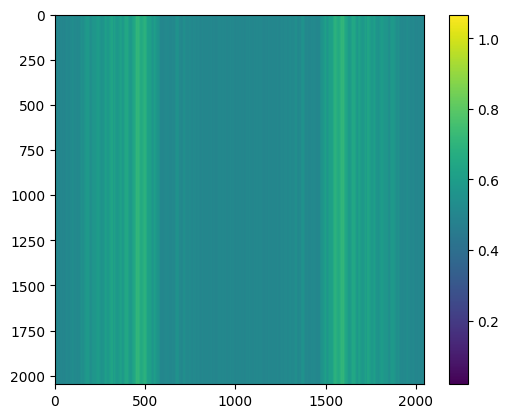

8.394026587677725
N 111603.00000000001


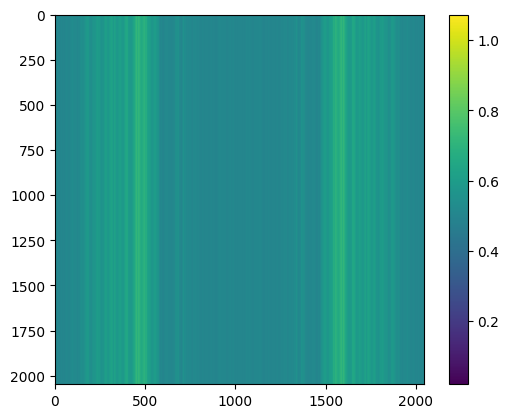

8.394101800947867
N 111604.00000000001


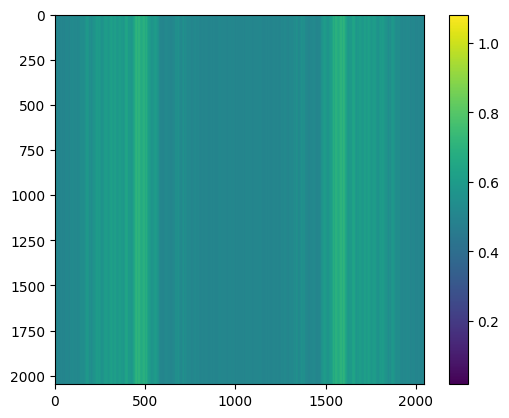

8.394177014218009
N 111605.00000000001


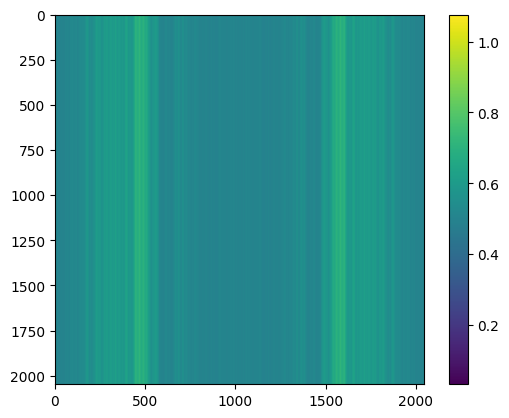

8.39425222748815
N 111606.0


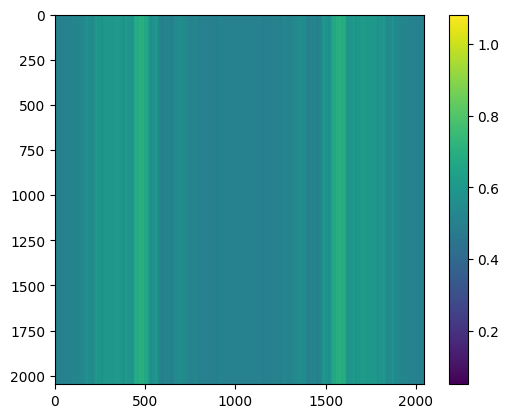

8.394327440758293
N 111607.0


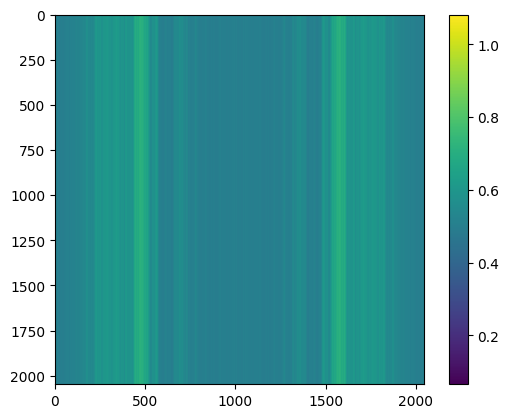

8.394402654028436
N 111608.00000000001


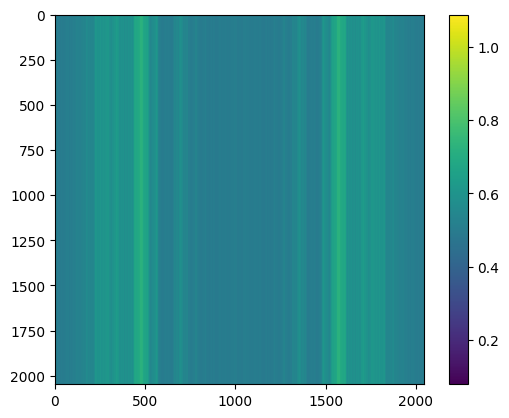

8.394477867298578
N 111609.00000000001


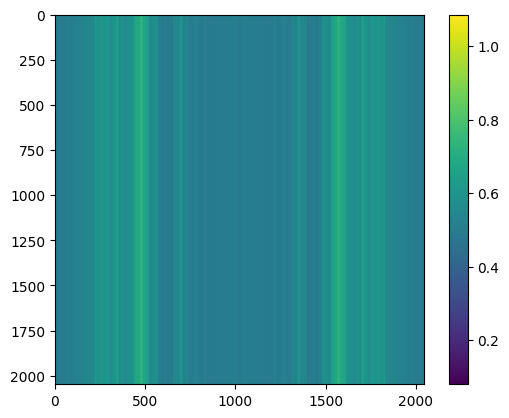

8.39455308056872
N 111610.00000000001


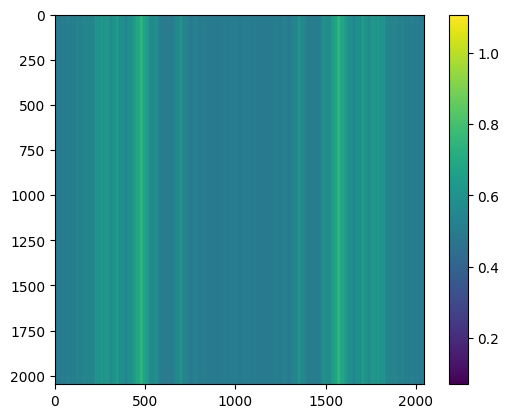

In [54]:
def TransFres(z, grating):

  unshifted_matrix = grating

  spectrum_z = np.fft.fft2(unshifted_matrix)

  p = np.fft.ifftshift(np.arange(-2048/2, 2048/2))
  q = np.fft.ifftshift(np.arange(-2048/2, 2048/2))
  p, q = np.meshgrid(p, q)

  multiplier = np.exp(-1 * 1j * z * np.pi * lamb * delf**2 * (p**2 + q**2))

  spectrum_0 = spectrum_z * multiplier
  spectrum_0 = np.fft.fftshift(spectrum_0)


  aperture_field = np.fft.ifft2(spectrum_0)


  plt.imshow(np.abs(aperture_field), cmap='viridis')
  plt.colorbar()
  plt.show()

n = 111600







Comparacion apertura difractada mediante espectro angular y fresnel

Comparacion metodos: AS


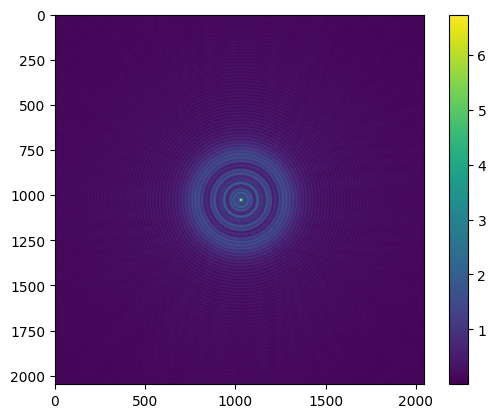

Comparacion metodos: Fresnel


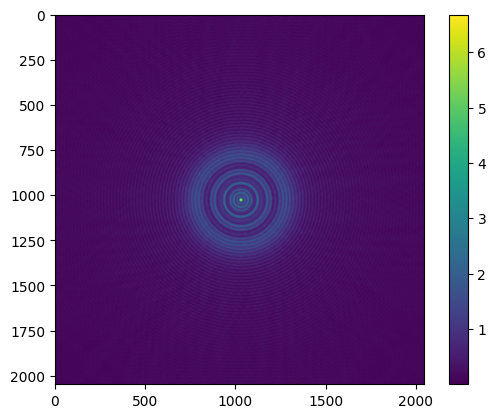

In [56]:
comparison_image = Image.open('2048.png')
comparison_image = np.array(comp_image, dtype=np.float32)
print('Comparacion metodos: AS')
Espectro_angular(lim, comparison_image)

print('Comparacion metodos: Fresnel')
TransFres(lim, comparison_image)



Difraccion por Fresnel en distancia minima


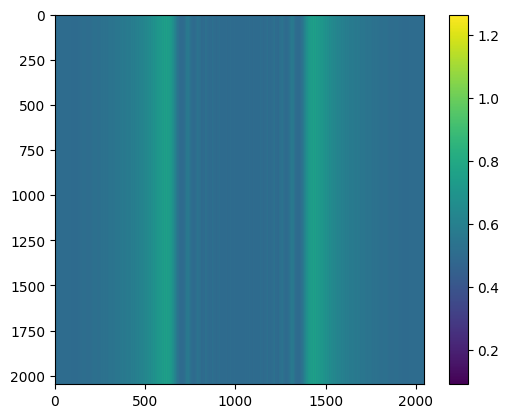

Difraccion por Fresnel en el doble de la distancia minima


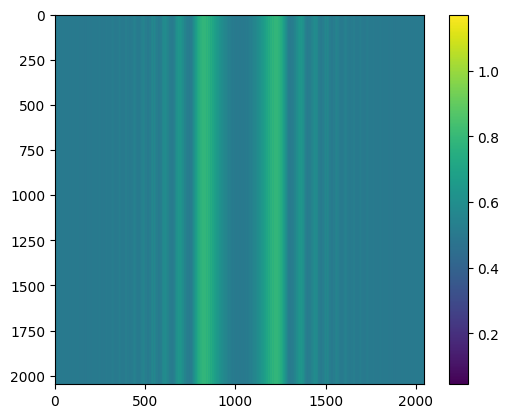

In [57]:
print('Difraccion por Fresnel en distancia minima')
TransFres(lim, malla)

print('Difraccion por Fresnel en el doble de la distancia minima')
TransFres(2*lim, malla)